In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from definitions import PROCESSED_DATA_DIR
from src.data.indicators import rsi, stochRSI, ema
from src.models.strategies import RSIStoch200EMA, BuyAndHold

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
btcusdt = pd.read_csv(PROCESSED_DATA_DIR / 'BTCUSDT.csv')
btcusdt.index = pd.DatetimeIndex(btcusdt['open time'])

btcusdt

,open time,open,high,low,close,volume,ema,rsi,stoch_k,stoch_d
open time,,,,,,,,,,
2017-08-17 20:30:00,2017-08-17 20:30:00,4301.91,4354.84,4262.53,4346.74,15.184266,4346.740000,NaN,NaN,NaN
2017-08-17 21:00:00,2017-08-17 21:00:00,4346.74,4369.69,4315.85,4349.33,29.292665,4346.765771,100.000000,NaN,NaN
2017-08-17 21:30:00,2017-08-17 21:30:00,4349.33,4369.69,4309.23,4333.55,32.480371,4346.634271,13.225186,NaN,NaN
2017-08-17 22:00:00,2017-08-17 22:00:00,4333.55,4349.63,4310.00,4326.29,26.241174,4346.431840,9.248769,NaN,NaN
2017-08-17 22:30:00,2017-08-17 22:30:00,4326.29,4359.13,4319.11,4336.80,31.134968,4346.336001,38.211911,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-31 21:30:00,2021-05-31 21:30:00,36775.02,37087.30,36623.01,36932.55,840.717074,36229.710395,58.482794,0.198487,0.133164
2021-05-31 22:00:00,2021-05-31 22:00:00,36932.55,37250.00,36863.28,37090.16,1407.839699,36238.272082,61.498708,0.419132,0.235186
2021-05-31 22:30:00,2021-05-31 22:30:00,37090.16,37140.00,36835.85,36879.23,908.355699,36244.649773,55.670255,0.430699,0.349439


In [133]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2
)

results = strategy.apply(
    ohlcv_timeseries=btcusdt.iloc[:17500],
    asset_name='BTCUSDT'
)

KeyboardInterrupt: 

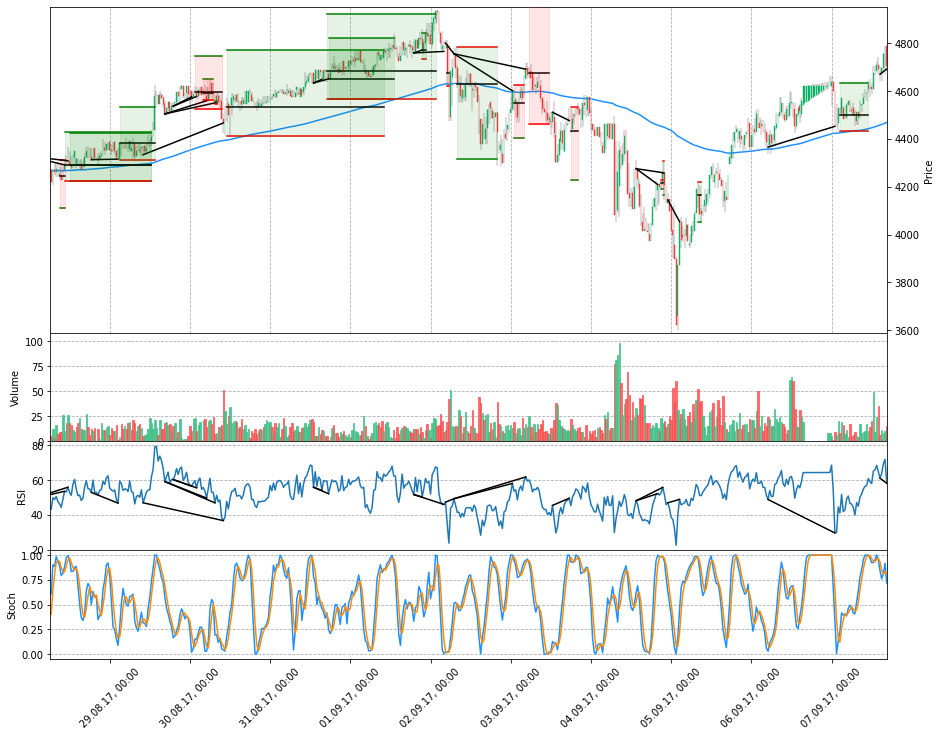

In [22]:
start_time = btcusdt.iloc[500].name
end_time = btcusdt.iloc[1000].name
results.plot(start_time, end_time)

In [7]:
buyandhold_strategy = BuyAndHold()
results = buyandhold_strategy.apply(
    ohlcv_timeseries=btcusdt,
    asset_name='BTCUSDT'
)
results.evaluation()
results.pnl

7.570517215200358

In [140]:
btcusdt.loc[pd.Timestamp('2021-05-01 00:00:00'):]

,open time,open,high,low,close,volume,ema,rsi,stoch_k,stoch_d
open time,,,,,,,,,,
2021-05-01 00:00:00,2021-05-01 00:00:00,57697.25,58088.00,57421.05,58043.34,2217.513426,54391.689362,77.267874,0.929340,0.687520
2021-05-01 00:30:00,2021-05-01 00:30:00,58043.33,58065.00,57647.00,57811.42,1262.936090,54425.716533,71.491751,0.838097,0.815617
2021-05-01 01:00:00,2021-05-01 01:00:00,57809.99,57926.75,57470.77,57816.33,1286.215723,54459.453980,71.540257,0.677553,0.814997
2021-05-01 01:30:00,2021-05-01 01:30:00,57816.34,58456.52,57727.36,58450.00,1702.164911,54499.160906,76.983234,0.669575,0.728408
2021-05-01 02:00:00,2021-05-01 02:00:00,58450.00,58458.07,58132.03,58319.99,1178.479534,54537.179106,73.862010,0.736013,0.694380
...,...,...,...,...,...,...,...,...,...,...
2021-05-31 21:30:00,2021-05-31 21:30:00,36775.02,37087.30,36623.01,36932.55,840.717074,36229.710395,58.482794,0.198487,0.133164
2021-05-31 22:00:00,2021-05-31 22:00:00,36932.55,37250.00,36863.28,37090.16,1407.839699,36238.272082,61.498708,0.419132,0.235186
2021-05-31 22:30:00,2021-05-31 22:30:00,37090.16,37140.00,36835.85,36879.23,908.355699,36244.649773,55.670255,0.430699,0.349439


In [141]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2
)

results = strategy.apply(
    ohlcv_timeseries=btcusdt.loc[pd.Timestamp('2021-05-01 00:00:00'):],
    asset_name='BTCUSDT'
)

#start_time = btcusdt.iloc[200].name
#end_time = btcusdt.iloc[400].name
#results.plot(btcusdt.iloc[0].name, btcusdt.iloc[500].name)

In [157]:
import numpy as np

max_number_open_trades=3

budget = 1.0
num_positions = 0

# Convert trades to chronology of buy/sell events
events = []
for t in results.trades:
    # Calculate profit and loss of individual trade
    if t['win']:
        if t['entry_price'] > t['take_profit']:  # short trade
            pnl = - (t['take_profit'] / t['entry_price'] - 1.0)
        else:  # long trade
            pnl = t['take_profit'] / t['entry_price'] - 1.0
    else:
        if t['entry_price'] < t['stop_loss']:  # short trade
            pnl = - (t['stop_loss'] / t['entry_price'] - 1.0)
        else:  # long trade
            pnl = t['stop_loss'] / t['entry_price'] - 1.0
    events.append({
        'timestamp': t['entry_time'],
        'event': 'entry',
        'entry_time': t['entry_time'],
        'exit_time': t['exit_time'],
        'pnl': pnl,
        'investment': np.NaN
    })
    events.append({
        'timestamp': t['exit_time'],
        'event': 'exit',
        'entry_time': t['entry_time'],
        'pnl': pnl
    })
    events_df = pd.DataFrame(events)
    events_df = events_df.sort_values(by=['timestamp', 'event'], ascending=[True, False]).reset_index()

In [158]:
for idx, row in events_df.iterrows():
    
    s = ''
    if row['event'] == 'entry':
        investment = budget / (max_number_open_trades - num_positions)
        events_df.loc[idx, 'investment'] = investment
        budget -= investment
        total[num_positions] = investment

        s = f'investment: {investment:.4f}'

        num_positions += 1
    elif row['event'] == 'exit':
        budget += events_df[(events_df['entry_time'] == row['entry_time']) & (events_df['event'] == 'entry')]['investment'].iloc[0] * \
            (1.0 + row['pnl'])
        num_positions -= 1
        
        s = f"outcome: {events_df[(events_df['entry_time'] == row['entry_time']) & (events_df['event'] == 'entry')]['investment'].iloc[0] * (1.0 + row['pnl']):.4f}"
    print(f"ts: {row['timestamp']} {row['event']}, num_pos: {num_positions}, {s}, budget: {budget}")

ts: 2021-05-01 06:00:00 entry, num_pos: 1, investment: 0.3333, budget: 0.6666666666666667
ts: 2021-05-01 06:30:00 entry, num_pos: 2, investment: 0.3333, budget: 0.33333333333333337
ts: 2021-05-01 07:00:00 exit, num_pos: 1, outcome: 0.3327, budget: 0.6660002465386566
ts: 2021-05-01 07:30:00 exit, num_pos: 0, outcome: 0.3301, budget: 0.996133224426545
ts: 2021-05-02 12:00:00 entry, num_pos: 1, investment: 0.3320, budget: 0.6640888162843632
ts: 2021-05-02 13:30:00 exit, num_pos: 0, outcome: 0.3300, budget: 0.9940450547443488
ts: 2021-05-03 11:00:00 entry, num_pos: 1, investment: 0.3313, budget: 0.6626967031628992
ts: 2021-05-03 12:00:00 entry, num_pos: 2, investment: 0.3313, budget: 0.3313483515814496
ts: 2021-05-03 13:30:00 exit, num_pos: 1, outcome: 0.3283, budget: 0.6596696244719553
ts: 2021-05-03 13:30:00 exit, num_pos: 0, outcome: 0.3301, budget: 0.9897927571163188
ts: 2021-05-03 19:00:00 entry, num_pos: 1, investment: 0.3299, budget: 0.6598618380775458
ts: 2021-05-03 19:30:00 exit, 

ts: 2021-05-21 21:00:00 exit, num_pos: 1, outcome: 0.4349, budget: 0.8142594740535471
ts: 2021-05-21 23:00:00 exit, num_pos: 0, outcome: 0.3647, budget: 1.1789778613044861
ts: 2021-05-23 08:00:00 entry, num_pos: 1, investment: 0.3930, budget: 0.7859852408696575
ts: 2021-05-23 12:30:00 entry, num_pos: 2, investment: 0.3930, budget: 0.39299262043482874
ts: 2021-05-23 16:30:00 exit, num_pos: 1, outcome: 0.4360, budget: 0.8290392390332106
ts: 2021-05-23 21:30:00 entry, num_pos: 2, investment: 0.4145, budget: 0.4145196195166053
ts: 2021-05-23 22:00:00 exit, num_pos: 1, outcome: 0.4083, budget: 0.822860369231162
ts: 2021-05-24 00:00:00 entry, num_pos: 2, investment: 0.4114, budget: 0.411430184615581
ts: 2021-05-24 00:30:00 exit, num_pos: 1, outcome: 0.4144, budget: 0.8258749235017891
ts: 2021-05-24 03:00:00 exit, num_pos: 0, outcome: 0.3708, budget: 1.1967169172130658
ts: 2021-05-24 06:00:00 entry, num_pos: 1, investment: 0.3989, budget: 0.7978112781420439
ts: 2021-05-24 06:30:00 exit, num_p

In [165]:
fin_data = btcusdt.loc[pd.Timestamp('2021-05-01 00:00:00'):]
pnl_history = pd.Series(index=fin_data.index)

budget = 1.0

open_positions = []

for idx, row in fin_data.iterrows():
    invested = 0.0
    
    entry_event = events_df[(events_df['timestamp'] == idx) & (events_df['event'] == 'entry')]
    # Add new position
    if len(event) > 0:
        budget -= entry_event['investment']
        open_positions.append({
            'entry_time': idx,
            'exit_time': entry_event['exit_time'],
            'entry_price': row['close'],
            'investment': entry_event['investment'],
            'final_pnl': entry_event['pnl']
        })
    for pos in open_positions:
        # Remove closed positions
        if pos['exit_time'] <= idx:
            budget += pos['final_pnl'] * pos['investment']
        else:
            invested += pos['investment'] * row['close'] / pos['entry_price']
    open_positions = [pos for pos in open_positions if pos['exit_time'] <= idx]

<ipython-input-165-dd13a1172826>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pnl_history = pd.Series(index=fin_data.index)


   index           timestamp  event          entry_time           exit_time  \
0      0 2021-05-01 06:00:00  entry 2021-05-01 06:00:00 2021-05-01 07:30:00   

        pnl  investment  
0 -0.009601    0.333333  
   index           timestamp  event          entry_time           exit_time  \
1      2 2021-05-01 06:30:00  entry 2021-05-01 06:30:00 2021-05-01 07:00:00   

        pnl  investment  
1 -0.001999    0.333333  
   index           timestamp  event          entry_time           exit_time  \
4      4 2021-05-02 12:00:00  entry 2021-05-02 12:00:00 2021-05-02 13:30:00   

        pnl  investment  
4 -0.006289    0.332044  
   index           timestamp  event          entry_time           exit_time  \
6      6 2021-05-03 11:00:00  entry 2021-05-03 11:00:00 2021-05-03 13:30:00   

        pnl  investment  
6 -0.009136    0.331348  
   index           timestamp  event          entry_time           exit_time  \
7      8 2021-05-03 12:00:00  entry 2021-05-03 12:00:00 2021-05-03 13:30:00  

    index           timestamp  event          entry_time           exit_time  \
94     94 2021-05-18 06:30:00  entry 2021-05-18 06:30:00 2021-05-18 14:00:00   

         pnl  investment  
94  0.042186    0.365143  
    index           timestamp  event          entry_time           exit_time  \
95     96 2021-05-18 09:00:00  entry 2021-05-18 09:00:00 2021-05-18 10:30:00   

         pnl  investment  
95 -0.013753    0.365143  
    index           timestamp  event          entry_time           exit_time  \
98     98 2021-05-18 18:00:00  entry 2021-05-18 18:00:00 2021-05-19 01:30:00   

         pnl  investment  
98  0.044379    0.368604  
     index           timestamp  event          entry_time           exit_time  \
100    100 2021-05-19 09:30:00  entry 2021-05-19 09:30:00 2021-05-19 10:30:00   

          pnl  investment  
100  0.029969    0.374057  
     index           timestamp  event          entry_time           exit_time  \
102    102 2021-05-19 17:30:00  entry 2021-05-19 17:30:

In [160]:
events_df

,index,timestamp,event,entry_time,exit_time,pnl,investment
0,0,2021-05-01 06:00:00,entry,2021-05-01 06:00:00,2021-05-01 07:30:00,-0.009601,0.333333
1,2,2021-05-01 06:30:00,entry,2021-05-01 06:30:00,2021-05-01 07:00:00,-0.001999,0.333333
2,3,2021-05-01 07:00:00,exit,2021-05-01 06:30:00,NaT,-0.001999,NaN
3,1,2021-05-01 07:30:00,exit,2021-05-01 06:00:00,NaT,-0.009601,NaN
4,4,2021-05-02 12:00:00,entry,2021-05-02 12:00:00,2021-05-02 13:30:00,-0.006289,0.332044
...,...,...,...,...,...,...,...
167,167,2021-05-31 10:00:00,exit,2021-05-31 09:30:00,NaT,-0.013682,NaN
168,168,2021-05-31 15:30:00,entry,2021-05-31 15:30:00,2021-05-31 23:00:00,-0.017966,0.374049
169,170,2021-05-31 21:00:00,entry,2021-05-31 21:00:00,2021-05-31 23:00:00,-0.008199,0.374049
170,169,2021-05-31 23:00:00,exit,2021-05-31 15:30:00,NaT,-0.017966,NaN


In [144]:
total

1.1123589062561272

In [151]:
ser = pd.Series(index = btcusdt.index)
ser.iloc[2] = 5
ser

<ipython-input-151-018e05163ac0>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series(index = btcusdt.index)


open time
2017-08-17 20:30:00    NaN
2017-08-17 21:00:00    NaN
2017-08-17 21:30:00    5.0
2017-08-17 22:00:00    NaN
2017-08-17 22:30:00    NaN
                      ... 
2021-05-31 21:30:00    NaN
2021-05-31 22:00:00    NaN
2021-05-31 22:30:00    NaN
2021-05-31 23:00:00    NaN
2021-05-31 23:30:00    NaN
Length: 66391, dtype: float64